Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the collected dataset

In [10]:
data = pd.read_csv('C:/Users/USER/Desktop/Project/Datasets/banana_dataset.csv')
data

,created_at,entry_id,Temperature,Humidity,Gas
0,2022-06-11T15:53:46+00:00,1,34.2,81.6,425.0
1,2022-06-11T15:54:39+00:00,2,34.3,83.8,425.0
2,2022-06-11T15:55:22+00:00,3,34.4,84.6,429.0
3,2022-06-11T15:55:55+00:00,4,34.4,85.7,438.0
4,2022-06-11T15:56:28+00:00,5,34.5,85.6,424.0
...,...,...,...,...,...
2240,2022-06-29T14:27:19+00:00,2241,34.9,96.4,290.0
2241,2022-06-29T14:27:53+00:00,2242,35.1,95.8,292.0
2242,2022-06-29T14:28:26+00:00,2243,35.2,95.3,299.0
2243,2022-06-29T14:29:00+00:00,2244,35.5,94.8,312.0


In [11]:
data["Gas"].fillna(data['Gas'].mean(), inplace=True) 

In [12]:
data.rename(columns= {'created_at': 'date'}, inplace=True)
data['date'] = data['date'].apply(lambda x: str(x)[:19])
data['date'] = pd.to_datetime(data['date'])

Classifying the Grades of the fruit

In [13]:
data["Grade"] = [0 for i in range (2245)]

data.loc[data['Gas'] < 130, 'Grade'] = 1
data.loc[(data['Gas'] >= 130) & (data['Gas'] < 210), "Grade"] = 2
data.loc[(data['Gas'] >= 210) & (data['Gas'] < 360), 'Grade'] = 3
data.loc[data['Gas'] >= 360, 'Grade'] = 4

Getting the total hours elapseed till date

In [14]:
import datetime
today = datetime.datetime.today()
today

datetime.datetime(2024, 3, 22, 3, 40, 53, 868368)

In [17]:
data['date'] = pd.to_datetime(data['date'])
data['Hours'] = (today - data['date'])/np.timedelta64(1,'h')

Sorting the hours

In [18]:
lst = list(data['Hours'])
lst.sort()
data.drop('Hours', axis=1, inplace=True)
ser = pd.Series(data = lst, index = data.index)
data['Hours'] = ser
data

,date,entry_id,Temperature,Humidity,Gas,Grade,Hours
0,2022-06-11 15:53:46,1,34.2,81.6,425.0,4,15157.189130
1,2022-06-11 15:54:39,2,34.3,83.8,425.0,4,15157.198297
2,2022-06-11 15:55:22,3,34.4,84.6,429.0,4,15157.207741
3,2022-06-11 15:55:55,4,34.4,85.7,438.0,4,15157.216908
4,2022-06-11 15:56:28,5,34.5,85.6,424.0,4,15157.226352
...,...,...,...,...,...,...,...
2240,2022-06-29 14:27:19,2241,34.9,96.4,290.0,3,15587.740519
2241,2022-06-29 14:27:53,2242,35.1,95.8,292.0,3,15587.749686
2242,2022-06-29 14:28:26,2243,35.2,95.3,299.0,3,15587.758852
2243,2022-06-29 14:29:00,2244,35.5,94.8,312.0,3,15587.770797


Splitting data to train, test

In [20]:
from sklearn.model_selection import train_test_split

X = data[['Temperature','Gas']]
y = data['Hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.metrics import r2_score

SVR

In [22]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr = SVR()
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)

In [23]:
# score = svr.score(X_test, y_test)
# print("R-squared:", score)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_svr)))
r2_score(y_test, pred_svr)

RMSE: 158.9077100163135


0.042176059467595506

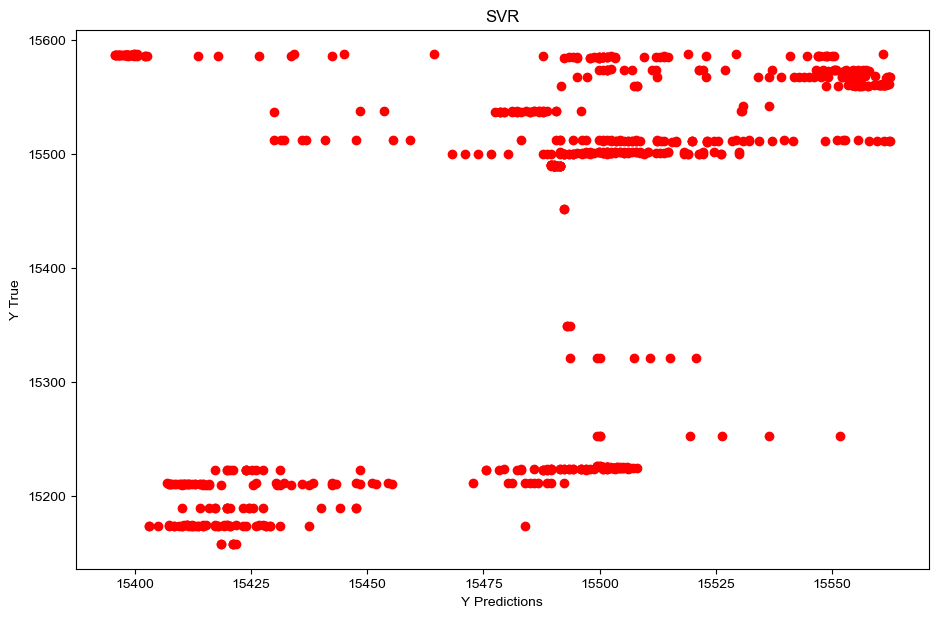

In [24]:
plt.figure(figsize=(11,7))
plt.title('SVR')
sns.set_style('whitegrid')
plt.xlabel('Y Predictions')
plt.ylabel('Y True')
plt.scatter(pred_svr, y_test, color='r')